<a href="https://colab.research.google.com/github/EJ-Ellie-John/NEDpython/blob/main/Final_Project_ML_Professor_Sajid_Najeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Project :Select a data set data preprocessing techniques. Data cleaning, correlation, data imputation, data report.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
df = pd.read_csv('/content/Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [16]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27893.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27898.000000,27901.000000
mean,70442.149421,25.822500,3.141214,0.000430,7.656104,2.943837,0.000681,7.157036,3.139867,0.585499
std,40641.175216,4.905979,1.381465,0.043992,1.470707,1.361148,0.044394,3.707748,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27896 non-null  object 
 2   Age                                    27893 non-null  float64
 3   City                                   27900 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27896 non-null  object 
 11  Di

In [18]:
df.isnull().sum()

,0
id,0
Gender,5
Age,8
City,1
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [19]:
# impute categorical columns with null values Gender, City, Sleep Duration, Degree, Family History of Mental Illness
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Sleep Duration'].fillna(df['Sleep Duration'].mode()[0], inplace=True)
df['Degree'].fillna(df['Degree'].mode()[0], inplace=True)
df['Family History of Mental Illness'].fillna(df['Family History of Mental Illness'].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-1708186047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna(df['City'].mode()[0], inplace=True)
/tmp/ipython-input-1708186047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,0
id,0
Gender,0
Age,8
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [20]:
#impute float columns null values Age, Worl/Study Hours, Financial Stress
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Work/Study Hours'].fillna(df['Work/Study Hours'].mean(), inplace=True)
df['Financial Stress'].fillna(df['Financial Stress'].mean(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-4184286631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-4184286631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [33]:
# encode feature columns
# Identify categorical columns with object dtype
categorical_cols = df.select_dtypes(include='object').columns

# Exclude the target variable 'Depression' if it's in the categorical columns
if 'Depression' in categorical_cols:
    categorical_cols = categorical_cols.drop('Depression')

df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)
df.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Female,Gender_Male,City_3,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Less Delhi,City_Less than 5 Kalyan,City_Lucknow,City_Ludhiana,City_M.Com,City_M.Tech,...,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Profession_Architect,Profession_Chef,Profession_Civil Engineer,Profession_Content Writer,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes
0,2,33.0,5,0,8.97,2,0,3.0,1.0,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
1,8,24.0,2,0,5.90,5,0,3.0,2.0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
2,26,31.0,3,0,7.03,5,0,9.0,1.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
3,30,28.0,3,0,5.59,2,0,4.0,5.0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
4,32,25.0,4,0,8.13,3,0,1.0,1.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True


Now that the categorical features have been encoded, I will scale the numerical features using `StandardScaler`. This will help to improve the performance of the machine learning models.

In [34]:
# Scale numerical features
numerical_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

display(X_train.head())
display(X_test.head())

,id,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Gender_Female,Gender_Male,City_3,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Less Delhi,City_Less than 5 Kalyan,City_Lucknow,City_Ludhiana,...,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Degree_B.Arch,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Family History of Mental Illness_No,Family History of Mental Illness_Yes
13048,-0.107815,0.446345,Student,-0.831332,-0.010931,0.436204,1.512335,-0.017151,Moderate,No,-0.847770,-1.486915,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
24535,1.305292,1.466535,Student,0.617851,-0.010931,0.952308,0.777709,-0.017151,Healthy,No,1.307490,0.599047,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
15303,0.165846,1.466535,Student,0.617851,-0.010931,0.293596,0.777709,-0.017151,Healthy,Yes,1.307490,-0.096274,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
22444,1.049670,0.650383,Student,-0.831332,-0.010931,-1.281881,0.777709,-0.017151,Moderate,No,0.768675,-0.791595,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
18744,0.599525,-1.185960,Student,1.342442,-0.010931,-1.275090,1.512335,-0.017151,Moderate,Yes,1.038082,1.294368,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


,id,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Gender_Female,Gender_Male,City_3,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Less Delhi,City_Less than 5 Kalyan,City_Lucknow,City_Ludhiana,...,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Degree_B.Arch,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Family History of Mental Illness_No,Family History of Mental Illness_Yes
19981,0.755316,0.650383,Student,-0.831332,-0.010931,0.599184,0.043084,-0.017151,Healthy,No,0.768675,1.294368,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
16551,0.325766,0.446345,Student,-0.831332,-0.010931,-1.410907,1.512335,-0.017151,Unhealthy,Yes,-1.117178,-1.486915,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
7640,-0.788342,1.670573,Student,-0.106741,-0.010931,-1.716495,0.777709,-0.017151,Moderate,Yes,-0.847770,-0.096274,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
21266,0.908404,-0.981922,Student,1.342442,-0.010931,0.884400,-0.691542,-0.017151,Unhealthy,Yes,0.229860,-1.486915,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
15759,0.225862,-0.165770,Student,1.342442,-0.010931,0.150988,-0.691542,-0.017151,Healthy,No,-1.925400,-0.096274,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [35]:
# Drop target variable Depression
X = df.drop('Depression', axis=1)
y = df['Depression']

In [36]:
X.shape

(27901, 118)

In [37]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Female,Gender_Male,City_3,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Less Delhi,City_Less than 5 Kalyan,City_Lucknow,City_Ludhiana,City_M.Com,City_M.Tech,City_ME,...,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Profession_Architect,Profession_Chef,Profession_Civil Engineer,Profession_Content Writer,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes
13048,66085,28.0,2,0,8.29,5,0,4.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
24535,123583,33.0,4,0,9.05,4,0,12.0,4.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
15303,77220,33.0,4,0,8.08,4,0,12.0,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
22444,113182,29.0,2,0,5.76,4,0,10.0,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
18744,94866,20.0,5,0,5.77,5,0,11.0,5.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,108952,34.0,2,0,7.79,4,0,10.0,1.0,True,False,False,False

In [39]:
X_test

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Female,Gender_Male,City_3,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Less Delhi,City_Less than 5 Kalyan,City_Lucknow,City_Ludhiana,City_M.Com,City_M.Tech,City_ME,...,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Profession_Architect,Profession_Chef,Profession_Civil Engineer,Profession_Content Writer,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes
19981,101205,29.0,2,0,8.53,3,0,10.0,5.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
16551,83727,28.0,2,0,5.57,5,0,3.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
7640,38395,34.0,3,0,5.12,4,0,4.0,3.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
21266,107434,21.0,5,0,8.95,2,0,8.0,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
15759,79662,25.0,5,0,7.87,2,0,0.0,3.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,34897,29.0,2,0,5.57,5,0,2.0,1.0,True,False,False,False,Tr

In [41]:
#Classification through Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf

DecisionTreeClassifier()

In [42]:
clf.score(X_test,y_test)
#

0.7676043719763483

In [43]:
# improve cross validation with Grid Search CV
from sklearn.model_selection import GridSearchCV

In [48]:
# implement Grid Search CV and use best parameters
params = {'max_depth': [2, 3, 5, 10, 20],
          'min_samples_leaf': [5, 10, 20]}

In [49]:
# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 20}
Best Accuracy: 0.8282706093189964


In [52]:
# Evaluate the Gradient Boosting model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

clf_GBC = GradientBoostingClassifier(random_state=42)
clf_GBC.fit(X_train, y_train)
y_pred_gbc = clf_GBC.predict(X_test)

print("Gradient Boosting Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_gbc))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_gbc))




Gradient Boosting Model Evaluation:

Confusion Matrix:
[[1833  510]
 [ 399 2839]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



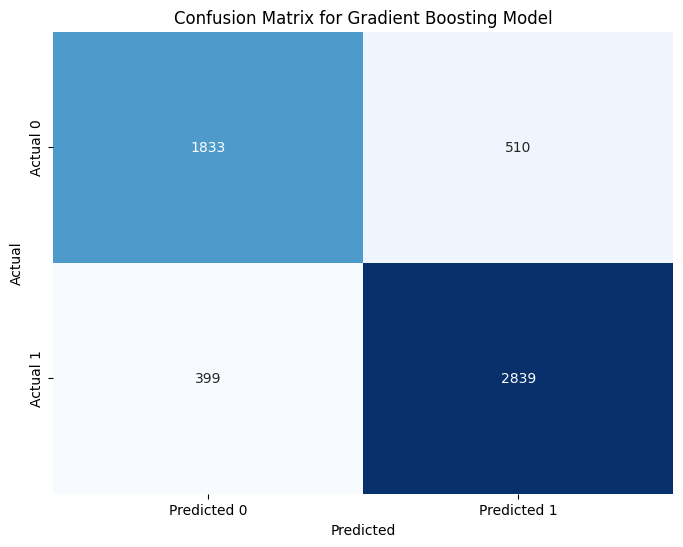

In [53]:
#print and plot confusion matrix
CM = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()